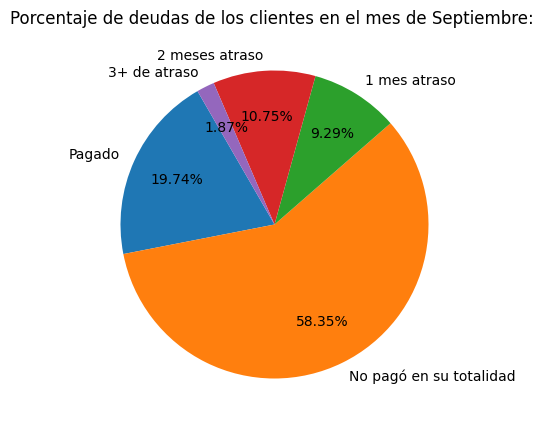

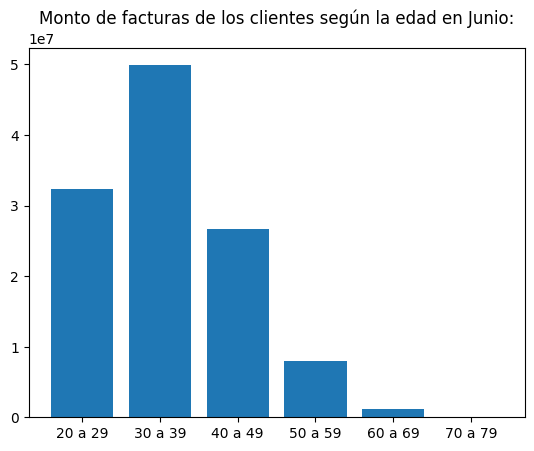

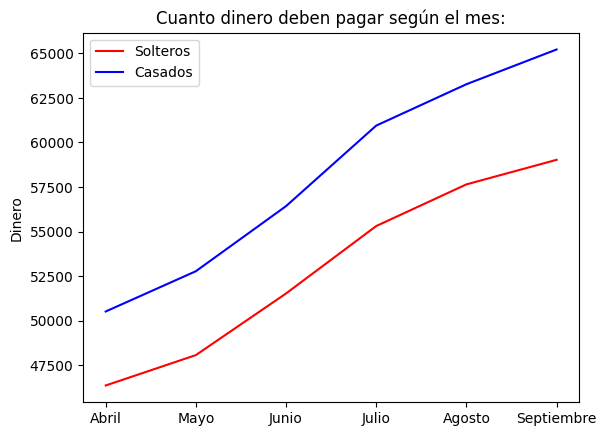

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt1
import matplotlib.pyplot as plt2

csv = pd.read_csv("archivo_salida.csv")

def limpiarColumnaGenero(valor):
  valor = str(valor)
  valor = valor.replace("1", "M")
  valor = valor.replace("2", "F")
  return valor


def limpiarColumnaEstadoCivil(valor):
  valor = str(valor)
  valor = valor.replace("1", "M")
  valor = valor.replace("2", "S")
  if valor ==  "3":
    valor = np.nan
  return  valor


def limpiarColumnaEstadoPago(valor):
  valor = str(valor)
  if valor == "-2":
    valor = np.nan
  else:
    valor = valor.replace("0", "No pagó en su totalidad")
    valor = valor.replace("-1", "Pagado")
    valor = valor.replace("1", "1 mes atraso")
    valor = valor.replace("2", "2 meses atraso")
    valor = valor.replace("3", "3 meses atraso")
    valor = valor.replace("4", "4 meses atraso")
    valor = valor.replace("5", "5 meses atraso")
    valor = valor.replace("6", "6 meses atraso")
    valor = valor.replace("7", "7 meses atraso")
    valor = valor.replace("8", "8 meses atraso")
    valor = valor.replace("9", "9+ meses atraso")

  return  valor


csv['SEX'] = csv['SEX'].apply(limpiarColumnaGenero)
csv['MARRIAGE'] = csv['MARRIAGE'].apply(limpiarColumnaEstadoCivil)
csv['PAY_0'] = csv['PAY_0'].apply(limpiarColumnaEstadoPago)
csv['PAY_2'] = csv['PAY_2'].apply(limpiarColumnaEstadoPago)
csv['PAY_3'] = csv['PAY_3'].apply(limpiarColumnaEstadoPago)
csv['PAY_4'] = csv['PAY_4'].apply(limpiarColumnaEstadoPago)
csv['PAY_5'] = csv['PAY_5'].apply(limpiarColumnaEstadoPago)
csv['PAY_6'] = csv['PAY_6'].apply(limpiarColumnaEstadoPago)
csv = csv.dropna()


nombres = csv['PAY_0'].unique()
labels = ['Pagado', 'No pagó en su totalidad', '1 mes atraso', '2 meses atraso', '3+ de atraso']
sizes = [(csv['PAY_0'] == nombres[0]).sum(), (csv['PAY_0'] == nombres[1]).sum(), (csv['PAY_0'] == nombres[2]).sum(), (csv['PAY_0'] == nombres[3]).sum(), (csv['PAY_0'] == nombres[4]).sum() + (csv['PAY_0'] == nombres[5]).sum() + (csv['PAY_0'] == nombres[6]).sum() + (csv['PAY_0'] == nombres[7]).sum() + (csv['PAY_0'] == nombres[8]).sum() + (csv['PAY_0'] == nombres[9]).sum()]
explode = (0, 0, 0, 0, 0)
fig1, ax1 = plt1.subplots(figsize=(5, 5))
ax1.pie(sizes, labels=labels, explode=explode, autopct='%.2f%%',startangle=120, pctdistance=0.7)
plt1.title('Porcentaje de deudas de los clientes en el mes de Septiembre: ')
plt1.show()



csv_fil = csv[(csv['AGE'] >= 21) & (csv['AGE'] <= 29)]
csv_fil2 = csv[(csv['AGE'] >= 30) & (csv['AGE'] <= 39)]
csv_fil3 = csv[(csv['AGE'] >= 40) & (csv['AGE'] <= 49)]
csv_fil4 = csv[(csv['AGE'] >= 50) & (csv['AGE'] <= 59)]
csv_fil5 = csv[(csv['AGE'] >= 60) & (csv['AGE'] <= 69)]
csv_fil6 = csv[(csv['AGE'] >= 70) & (csv['AGE'] <= 79)]
array = ['20 a 29', '30 a 39', '40 a 49', '50 a 59', '60 a 69', '70 a 79']
plt2.bar(array, [(csv_fil['PAY_AMT4']).sum(), (csv_fil2['PAY_AMT4']).sum(), (csv_fil3['PAY_AMT4']).sum(), (csv_fil4['PAY_AMT4']).sum(), (csv_fil5['PAY_AMT4']).sum(), (csv_fil6['PAY_AMT4']).sum()])
plt2.title('Monto de facturas de los clientes según la edad en Junio:')
plt2.show()



csv_filtrado = csv[csv['MARRIAGE'] == 'S']
csv_filtrado2 = csv[csv['MARRIAGE'] == 'M']
array = ['Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre']
array2 = [csv_filtrado['BILL_AMT6'].mean(), csv_filtrado['BILL_AMT5'].mean(), csv_filtrado['BILL_AMT4'].mean(), csv_filtrado['BILL_AMT3'].mean(), csv_filtrado['BILL_AMT2'].mean(), csv_filtrado['BILL_AMT1'].mean()]
array3 = [csv_filtrado2['BILL_AMT6'].mean(), csv_filtrado2['BILL_AMT5'].mean(), csv_filtrado2['BILL_AMT4'].mean(), csv_filtrado2['BILL_AMT3'].mean(), csv_filtrado2['BILL_AMT2'].mean(), csv_filtrado2['BILL_AMT1'].mean()]
plt1.plot(array, array2, color = "red", label= "Solteros")
plt1.plot(array, array3, color = "blue", label= "Casados")
plt1.title("Cuanto dinero deben pagar según el mes:")
plt2.ylabel('Dinero')
plt1.legend()
plt1.show()